# Teaching machine learning with weather predicition dataset
- Task: predict BBQ weather (True/False) for the next day based on single-day weather observations.
- Technique: Random forest classifier
- Tool: Python + Scikit-learn

In [1]:
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Pipeline for using machine learning on weather prediction dataset

### Load data

In [3]:
# Read data
path_data = os.path.join('..', "dataset")
filename_data = os.path.join(path_data, "weather_prediction_dataset.csv")

In [4]:
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


### Load extra BBQ labels

In [5]:
filename_data = os.path.join(path_data, "weather_prediction_bbq_labels.csv")
labels_bbq = pd.read_csv(filename_data)
labels_bbq.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Split the data
We only select the first three years of data. We split into train and test, and then into X and y.

In [6]:
data_3years = data[:365*3].drop(columns=['DATE', 'MONTH'])
labels_3years = labels_bbq[1:(365 * 3 + 1)].drop(columns=['DATE'])

In [7]:
X, X_test, y, y_test = train_test_split(data_3years, labels_3years["DUSSELDORF_BBQ_weather"],
                                        test_size=0.3, random_state=0)
#y = y.astype(int)
#y_test = y_test.astype(int)
X.shape, X_test.shape, y.shape, y_test.shape

((766, 163), (329, 163), (766,), (329,))

In [8]:
y

182     False
426     False
1022    False
10      False
857      True
        ...  
1034    False
764     False
836     False
560     False
685     False
Name: DUSSELDORF_BBQ_weather, Length: 766, dtype: bool

## Define a pipeline
We define an sklearn pipeline with two steps:
- normalize the features to a 0-1 range
- A [Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with 10 trees with a maximum depth of 5

In [45]:
# We give the pipeline tuples of step names, and step objects
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0))
])

In [46]:
pipe.fit(X, y)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, n_estimators=50,
                                        random_state=0))])

We can use this pipe directly to predict the class label, or plot a confusion matrix. We first plot the confusion matrix for the train set:

In [47]:
predictions = pipe.predict(X)
predictions[:10]

array([False, False, False, False,  True, False, False, False,  True,
       False])

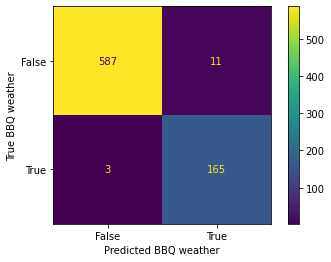

In [48]:
from matplotlib import pyplot as plt

labels = ["True month", "Predicted month"]
conf_mat = plot_confusion_matrix(pipe, X, y)

plt.xlabel("Predicted BBQ weather")
plt.ylabel("True BBQ weather")
plt.savefig("random_forest_month_classification_bbq.png", dpi=300)

To now test in on our test set:

In [49]:
pred_test = pipe.predict(X_test)

We plot a confusion matrix for the predictions on the test set. To make sure the classes are nicely ordered, we define the labels explitely.

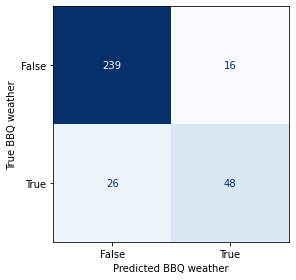

In [50]:
labels = y.unique()
labels = labels.sort()

conf_mat = plot_confusion_matrix(pipe, X_test, y_test,
                                 labels=labels,
                                 cmap="Blues", colorbar=False)

plt.xlabel("Predicted BBQ weather")
plt.ylabel("True BBQ weather")
plt.tight_layout()
plt.savefig("random_forest_month_classification_bbq_testset.png", dpi=300)
plt.savefig("random_forest_month_classification_bbq_testset.pdf")

In [51]:
import numpy as np

recall = conf_mat.confusion_matrix[1,1] / np.sum(conf_mat.confusion_matrix[1,:])
print(f"recall: {recall:.4f}")

precision = conf_mat.confusion_matrix[1,1] / np.sum(conf_mat.confusion_matrix[:, 1])
print(f"precision: {precision:.4f}")

recall: 0.6486
precision: 0.7500


It seems that the confusion matrix is worse than the one on the train set, but it is difficult to draw this conclusion from the confusion matrix alone. It would be nice to have one score that expresses how well our model does.

We calculate *accuracy*: this is the number of correctly labeled instances, divided the total number of instances. Note that this score works well when we have a balanced dataset (similar number of instances per class) but if we have imbalanced class, the majority class can dominate the score.

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
pred_test = pipe.predict(X_test)
print('Train accuracy:', accuracy_score(y, predictions))
print('Test accuracy:', accuracy_score(y_test, pred_test))

Train accuracy: 0.9817232375979112
Test accuracy: 0.8723404255319149


This results looks quiet OK-ish, but
- there is a clear sign of overfitting (performance on training data much better than on test data)
- there is a bias in the data (most days are not BBQ weather).